# Coordinates preparation for MolML

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from molml.features import CoulombMatrix
# ml4chem dscribe 

Now I'm reading the CSV file and creating a Pandas DataFrame.

In [21]:
df = pd.read_pickle("../Databases/FinalDataFrame.pkl") # Reading the CSV
#df = df.drop("Unnamed: 0", axis=1) # drop the useless colummn named "Unnamed: 0"
#df = df.fillna(value=np.nan) # Let me TRY to get rid od None values
#df = df.dropna(axis=1) # Let me get rid of all NaN colummns

In [22]:
df

,Structure name,Cartesian coordinates,Internal coordinates,Coordination number,Spin deviation,SOMO-LUMO gap (a.u),SOMO-1-LUMO gap,SOMO-2-LUMO gap,Dipole moment X,Dipole moment Y,...,CAS d-orb5 (eV),CAS d-orb5 (cm-1),CAS d-orb5 (xy),CAS d-orb5 (yz),CAS d-orb5 (z2),CAS d-orb5 (xz),CAS d-orb5 (x2y2),CAS SOC a,CAS SOC b,CAS SOC Zeta
0,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.004851,0.247089,0.284753,0.285264,-0.00352,-0.00028,...,1.152,9290.6,0.000008,0.000030,-0.476433,0.000001,0.879211,15.0,7696.8,513.1
1,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005017,0.240847,0.277491,0.277991,0.06549,-0.00027,...,1.115,8991.8,0.000003,0.000028,-0.480083,-0.000123,0.877223,15.0,7733.0,515.5
2,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005187,0.234146,0.270097,0.270589,0.12956,-0.00027,...,1.082,8723.5,-0.000001,0.000026,-0.482624,-0.000205,0.875827,15.0,7759.6,517.3
3,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005390,0.227257,0.262616,0.263108,0.19030,-0.00027,...,1.052,8484.3,-0.000004,0.000024,-0.484432,-0.000256,0.874829,15.0,7779.4,518.6
4,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005605,0.220374,0.255300,0.255786,0.24842,-0.00028,...,1.026,8271.5,-0.000006,0.000022,-0.485724,-0.000286,0.874112,15.0,7794.5,519.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33726,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004240,0.157423,0.182551,0.194410,0.87321,0.15602,...,0.996,8036.8,0.019439,0.120101,-0.866030,0.012833,-0.484793,15.0,7934.9,529.0
33727,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004301,0.157366,0.180859,0.194069,0.87175,0.17913,...,0.985,7948.0,0.019854,0.143416,-0.861850,0.013476,-0.485871,15.0,7934.7,529.0
33728,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004381,0.157471,0.179603,0.193595,0.88160,0.19964,...,0.973,7847.2,0.020284,0.165409,-0.857055,0.014188,-0.487322,15.0,7934.5,529.0
33729,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004434,0.157530,0.178495,0.192848,0.88120,0.21629,...,0.959,7735.6,0.020732,0.185852,-0.851728,0.014980,-0.489249,15.0,7934.4,529.0


## Let's create a fake XYZ file just in case

In [23]:
numberoflines = "" # Initialize the string to store he number of elements lines on my fake XYZ file
xyzfilelist = [] # Here I'll store each XYZ file that I'm creating as a list

for i in range(len(df["Cartesian coordinates"])):
    numberoflines = df["Cartesian coordinates"].iloc[i].count("\n")+1 # Easier to count every line break + 1 in the cartesian coordinates
    xyzfilelist.append("""{0}
    
    {1}
    """.format(numberoflines, df["Cartesian coordinates"].iloc[i])
    )

## Let's prepare the lists that can be used by MolML

In [24]:
Matrices = []
tempElements = []
tempCoordinates = []
tempMolecule_Z = []
Elements = []
Molecule_Z = []
Coordinates = []
Coordinatesfloat = []

In [25]:
# Each molecule's cartesian coodinates is stored in a list

for i in range(len(df["Cartesian coordinates"])):
    Matrices.append(df["Cartesian coordinates"][i].split("\n"))

In [26]:
Matrices[0]

['  Co     0.000000    0.000000    0.000000',
 '  N      1.800000    0.000000    0.000000',
 '  N     -1.800000    0.000000    0.000000',
 '  H      2.203241    0.816725    0.492731',
 '  H      2.203215   -0.835101    0.460932',
 '  H      2.203210    0.018346   -0.953688',
 '  H     -2.203227    0.814156    0.496977',
 '  H     -2.203217    0.023314   -0.953576',
 '  H     -2.203223   -0.837481    0.456586']

In [27]:
# Each element from each molecule is stored as a list in a list

for i in range(len(Matrices)):
    for j in range(len(Matrices[i])):
        tempElements.append(Matrices[i][j].split()[0])
    Elements.append(tempElements)
    tempElements = []

In [28]:
Elements[0]

['Co', 'N', 'N', 'H', 'H', 'H', 'H', 'H', 'H']

In [29]:
# Each coordinate for each element for each molecule is stored as a list in a list
# This code uses no numpy arrays

bufferline = []

for i in range(len(Matrices)):
    for j in range(len(Matrices[i])):
        for k in range(len((Matrices[i][j].split()[1:]))):
            bufferline.append(float(Matrices[i][j].split()[1:][k]))
        tempCoordinates.append(bufferline)
        bufferline = []
    Coordinates.append(tempCoordinates)
    tempCoordinates = []
for i in range(len(Coordinates)):
    Coordinatesfloat.append(Coordinates[i])

In [30]:
# Each coordinate for each element for each molecule is stored as a list in a list
# This code uses numpy arrays and I am keeping it here just in case

#for i in range(len(Matrices)):
#    for j in range(len(Matrices[i])):
#        tempCoordinates.append(np.array(Matrices[i][j].split()[1:]))
#    Coordinates.append(np.array(tempCoordinates))
#    tempCoordinates = []
#for i in range(len(Coordinates)):
#    Coordinatesfloat.append(Coordinates[i].astype(np.float))

In [31]:
atomic_numbers = {"Co": 27, "S": 16, "P": 15, "O": 8, "N": 7, "C": 1, "H": 1}

for i in range(len(Elements)):
    for j in Elements[i]:
        if j in atomic_numbers.keys():
            tempMolecule_Z.append(atomic_numbers[j])
    Molecule_Z.append(tempMolecule_Z)
    tempMolecule_Z = []

In [32]:
number_of_elements = []

for i in range(len(df)):
    number_of_elements.append(len(Elements[i]))

In [33]:
df["Number of elements"] = number_of_elements

In [34]:
df["Elements"] = Elements

In [35]:
df["Coordinates"] = Coordinatesfloat

In [36]:
df["Z"] = Molecule_Z

In [37]:
df.columns

Index(['Structure name', 'Cartesian coordinates', 'Internal coordinates',
       'Coordination number', 'Spin deviation', 'SOMO-LUMO gap (a.u)',
       'SOMO-1-LUMO gap', 'SOMO-2-LUMO gap', 'Dipole moment X',
       'Dipole moment Y', 'Dipole moment Z', 'Bond lengths 1',
       'Bond lengths 2', 'Bond angles', 'CAS root Mult', 'CAS GS energy (Eh)',
       'CAS transition energies', 'CAS 1 el energy (Eh)',
       'CAS 2 el energy (Eh)', 'CAS nucl. repulsion (Eh)',
       'Kinetic energy (Eh)', 'Potential energy (Eh)', 'Virial ratio (Eh)',
       'Core energy (Eh)', 'SOC CAS lowest eigenv. (Eh)',
       'SOC CAS stab. energy (cm-1)', 'CAS Kramers', 'CAS Ms states',
       'CAS 2PT D', 'CAS 2PT E/D', 'CAS Heff D', 'CAS Heff E/D', 'CAS gx',
       'CAS gy', 'CAS gz', 'CAS giso', 'CAS F0dd', 'CAS F2dd', 'CAS F4dd',
       'CAS Racah A', 'CAS Racah B', 'CAS Racah C', 'CAS d-orb1 (eV)',
       'CAS d-orb1 (cm-1)', 'CAS d-orb1 (xy)', 'CAS d-orb1 (yz)',
       'CAS d-orb1 (z2)', 'CAS d-orb1 (xz

In [38]:
#df.drop(["NEVPT2 transition energies", "NEVPT2 Ms states", "NEVPT2 Kramers"], axis=1, inplace=True)

# Let's try to generate our Coulumb Matrices?

In [39]:
coulumbList = []

In [40]:
# We need to select the elements, the coordinates and the atomic numbers

feat = CoulombMatrix(input_type=("elements","coords", "numbers"), sort=False)

In [41]:
for i in range(len(df["Elements"])):
    my_mol = [df["Elements"][i], df["Coordinates"][i], df["Z"][i]]
    feat.fit([my_mol])
    coulumbList.append(np.reshape(feat.transform([my_mol]), (len(df["Elements"][i]), len(df["Elements"][i]))))
    my_mol = []

In [42]:
df["Coulumb matrix"] = coulumbList

In [43]:
paddedCoulomb = []

for i in range(len(df)):
    paddedCoulomb.append(np.pad(df["Coulumb matrix"][i], ((0,df["Number of elements"].max() - df["Number of elements"][i]),(0,df["Number of elements"].max() - df["Number of elements"][i])), 'constant'))

In [44]:
df["Padded coulumb matrix"] = paddedCoulomb

In [45]:
df.head(1)

,Structure name,Cartesian coordinates,Internal coordinates,Coordination number,Spin deviation,SOMO-LUMO gap (a.u),SOMO-1-LUMO gap,SOMO-2-LUMO gap,Dipole moment X,Dipole moment Y,...,CAS d-orb5 (x2y2),CAS SOC a,CAS SOC b,CAS SOC Zeta,Number of elements,Elements,Coordinates,Z,Coulumb matrix,Padded coulumb matrix
0,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.004851,0.247089,0.284753,0.285264,-0.00352,-0.00028,...,0.879211,15.0,7696.8,513.1,9,"[Co, N, N, H, H, H, H, H, H]","[[0.0, 0.0, 0.0], [1.8, 0.0, 0.0], [-1.8, 0.0,...","[27, 7, 7, 1, 1, 1, 1, 1, 1]","[[1362.2067824695678, 105.0, 105.0, 11.2460036...","[[1362.2067824695678, 105.0, 105.0, 11.2460036..."


In [67]:
df.to_pickle("../Databases/FinalDataFrameCM.pkl")

<AxesSubplot:>

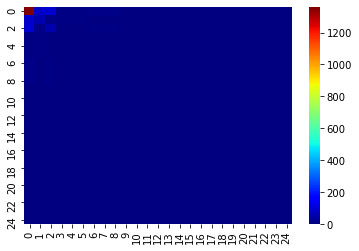

In [68]:
sns.heatmap(df["Padded coulumb matrix"][1000], cmap="jet")

In [69]:
df

,Structure name,Cartesian coordinates,Internal coordinates,Coordination number,Spin deviation,SOMO-LUMO gap (a.u),SOMO-1-LUMO gap,SOMO-2-LUMO gap,Dipole moment X,Dipole moment Y,...,CAS d-orb5 (x2y2),CAS SOC a,CAS SOC b,CAS SOC Zeta,Number of elements,Elements,Coordinates,Z,Coulumb matrix,Padded coulumb matrix
0,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.004851,0.247089,0.284753,0.285264,-0.00352,-0.00028,...,0.879211,15.0,7696.8,513.1,9,"[Co, N, N, H, H, H, H, H, H]","[[0.0, 0.0, 0.0], [1.8, 0.0, 0.0], [-1.8, 0.0,...","[27, 7, 7, 1, 1, 1, 1, 1, 1]","[[1362.2067824695678, 105.0, 105.0, 11.2460036...","[[1362.2067824695678, 105.0, 105.0, 11.2460036..."
1,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005017,0.240847,0.277491,0.277991,0.06549,-0.00027,...,0.877223,15.0,7733.0,515.5,9,"[Co, N, N, H, H, H, H, H, H]","[[0.0, 0.0, 0.0], [1.8, 0.0, 0.0], [-1.9, 0.0,...","[27, 7, 7, 1, 1, 1, 1, 1, 1]","[[1362.2067824695678, 105.0, 99.47368421052632...","[[1362.2067824695678, 105.0, 99.47368421052632..."
2,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005187,0.234146,0.270097,0.270589,0.12956,-0.00027,...,0.875827,15.0,7759.6,517.3,9,"[Co, N, N, H, H, H, H, H, H]","[[0.0, 0.0, 0.0], [1.8, 0.0, 0.0], [-2.0, 0.0,...","[27, 7, 7, 1, 1, 1, 1, 1, 1]","[[1362.2067824695678, 105.0, 94.5, 11.24600362...","[[1362.2067824695678, 105.0, 94.5, 11.24600362..."
3,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005390,0.227257,0.262616,0.263108,0.19030,-0.00027,...,0.874829,15.0,7779.4,518.6,9,"[Co, N, N, H, H, H, H, H, H]","[[0.0, 0.0, 0.0], [1.8, 0.0, 0.0], [-2.1, 0.0,...","[27, 7, 7, 1, 1, 1, 1, 1, 1]","[[1362.2067824695678, 105.0, 90.0, 11.24600362...","[[1362.2067824695678, 105.0, 90.0, 11.24600362..."
4,CoNN,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,2,0.005605,0.220374,0.255300,0.255786,0.24842,-0.00028,...,0.874112,15.0,7794.5,519.6,9,"[Co, N, N, H, H, H, H, H, H]","[[0.0, 0.0, 0.0], [1.8, 0.0, 0.0], [-2.2, 0.0,...","[27, 7, 7, 1, 1, 1, 1, 1, 1]","[[1362.2067824695678, 105.0, 85.9090909090909,...","[[1362.2067824695678, 105.0, 85.9090909090909,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33726,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004240,0.157423,0.182551,0.194410,0.87321,0.15602,...,-0.484793,15.0,7934.9,529.0,20,"[Co, N, O, O, O, O, O, H, H, H, H, H, H, H, H,...","[[0.0, 0.0, 0.0], [4.0, 0.0, 0.0], [-0.078303,...","[27, 7, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1,...","[[1362.2067824695678, 47.25, 100.3326543610472...","[[1362.2067824695678, 47.25, 100.3326543610472..."
33727,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004301,0.157366,0.180859,0.194069,0.87175,0.17913,...,-0.485871,15.0,7934.7,529.0,20,"[Co, N, O, O, O, O, O, H, H, H, H, H, H, H, H,...","[[0.0, 0.0, 0.0], [4.0, 0.0, 0.0], [-0.078303,...","[27, 7, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1,...","[[1362.2067824695678, 47.25, 100.3326543610472...","[[1362.2067824695678, 47.25, 100.3326543610472..."
33728,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004381,0.157471,0.179603,0.193595,0.88160,0.19964,...,-0.487322,15.0,7934.5,529.0,20,"[Co, N, O, O, O, O, O, H, H, H, H, H, H, H, H,...","[[0.0, 0.0, 0.0], [4.0, 0.0, 0.0], [-0.078303,...","[27, 7, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1,...","[[1362.2067824695678, 47.25, 100.3326543610472...","[[1362.2067824695678, 47.25, 100.3326543610472..."
33729,CoNOOOOO,Co 0.000000 0.000000 0.000000\n N...,Co 0 0 0 0.000000000000 0.000...,6,0.004434,0.157530,0.178495,0.192848,0.88120,0.21629,...,-0.489249,15.0,7934.4,529.0,20,"[Co, N, O, O, O, O, O, H, H, H, H, H, H, H, H,...","[[0.0, 0.0, 0.0], [4.0, 0.0, 0.0], [-0.078303,...","[27, 7, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1,...","[[1362.2067824695678, 47.25, 100.3326543610472...",